In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# --------------------------------------

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv(r"mobileprice.csv")
df.head()

,Unnamed: 0,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,0,"LG V30+ (Black, 128 )",4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,1,I Kall K11,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,2,Nokia 105 ss,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,3,"Samsung Galaxy A50 (White, 64 )",4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4,"POCO F1 (Steel Blue, 128 )",4.5,6.0,128.0,6.18,35,15.0,3800,18999


In [3]:
def getData(data, value):
    print(f"{value} Unique Value Len: {len(data[value].unique())}")
    print(f"{value} Min: {data[value].min()}")
    print(f"{value} Max: {data[value].max()}")

In [4]:
lst = ['Ratings', 'RAM', 'ROM', 'Primary_Cam', 'Battery_Power', 'Mobile_Size']

for i in lst:
    getData(df, i)
    print('-'*50)

Ratings Unique Value Len: 21
Ratings Min: 2.8
Ratings Max: 4.8
--------------------------------------------------
RAM Unique Value Len: 14
RAM Min: 0.0
RAM Max: 34.0
--------------------------------------------------
ROM Unique Value Len: 23
ROM Min: 0.0
ROM Max: 256.0
--------------------------------------------------
Primary_Cam Unique Value Len: 11
Primary_Cam Min: 5
Primary_Cam Max: 64
--------------------------------------------------
Battery_Power Unique Value Len: 49
Battery_Power Min: 1020
Battery_Power Max: 6000
--------------------------------------------------
Mobile_Size Unique Value Len: 48
Mobile_Size Min: 2.0
Mobile_Size Max: 44.0
--------------------------------------------------


In [5]:
sorted(df['RAM'].unique())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 12.0, nan, 25.0, 30.0, 34.0]

In [6]:
df.isna().sum()

Unnamed: 0         0
Brand me           0
Ratings           31
RAM                7
ROM                4
Mobile_Size        2
Primary_Cam        0
Selfi_Cam        269
Battery_Power      0
Price              0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     836 non-null    int64  
 1   Brand me       836 non-null    object 
 2   Ratings        805 non-null    float64
 3   RAM            829 non-null    float64
 4   ROM            832 non-null    float64
 5   Mobile_Size    834 non-null    float64
 6   Primary_Cam    836 non-null    int64  
 7   Selfi_Cam      567 non-null    float64
 8   Battery_Power  836 non-null    int64  
 9   Price          836 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 65.4+ KB


In [8]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [9]:
lst = list(df['Brand me'].unique())
lst

['LG V30+ (Black, 128 )',
 'I Kall K11',
 'Nokia 105 ss',
 'Samsung Galaxy A50 (White, 64 )',
 'POCO F1 (Steel Blue, 128 )',
 'Apple iPhone 11 Pro (Space Grey, 512 )',
 'Samsung Galaxy A70s (Prism Crush Red, 128 )',
 'Samsung Galaxy S10 Lite (Prism Blue, 512 )',
 'OPPO A9 (Marble Green, 128 )',
 'POCO F1 (Graphite Black, 256 )',
 'Megus Ultra',
 'Jmax M40 Coo of Two',
 'Wizphone WP (Black, 16 )',
 'Easyfone Star',
 'OnePlus 7 Pro (Nebula Blue, 256 )',
 'OnePlus 7 Pro (Mirror Grey, 128 )',
 'Kechaoda A27',
 'Samsung Galaxy S20+ (Cloud Blue, 128 )',
 'Samsung Galaxy S10 Lite (Prism Black, 512 )',
 'OPPO A5s (Red, 32 )',
 'InFocus POWER 2',
 'Blacear I7 Trio',
 'Karbonn K451 Power',
 'Micax X742',
 'Snexian Guru 332',
 'Blacear i7 Trio',
 'Karbonn K334',
 'Lava Prime X',
 'I Kall K23 New Mobile',
 'InFocus Selfie C1',
 'LG G8X (Black, 128 )',
 'Gee A1 (Grey, 64 )',
 'Tecno Camon 15 Pro (Opal White, 128 )',
 'Lava A7',
 'Apple iPhone XR ((PRODUCT)RED, 128 )',
 'Micax X749',
 'Itel it2161',

In [10]:
len(lst)

427

In [11]:
df.duplicated().sum()

206

### Seprating Main Brands From Others

In [12]:
# 1st Word of all the mobiles
for i in lst:
    print(str.split(i)[0])

LG
I
Nokia
Samsung
POCO
Apple
Samsung
Samsung
OPPO
POCO
Megus
Jmax
Wizphone
Easyfone
OnePlus
OnePlus
Kechaoda
Samsung
Samsung
OPPO
InFocus
Blacear
Karbonn
Micax
Snexian
Blacear
Karbonn
Lava
I
InFocus
LG
Gee
Tecno
Lava
Apple
Micax
Itel
Karbonn
Karbonn
Inovu
LG
OPPO
Micax
Meizu
Jivi
Nokia
Lava
Easyfone
Apple
Samsung
Black
Karbonn
InFocus
Blacear
Apple
JIVI
Alcatel
Kechaoda
Redmi
Salora
Redmi
Apple
Apple
Gee
Gee
Easyfone
JIVI
Karbonn
Nexus
OPPO
Apple
Dublin
Karbonn
LG
OPPO
Redmi
Nokia
Kechaoda
Itel
OPPO
Jivi
Inovu
Easyfone
Gee
Nokia
Jivi
Micax
Samsung
Samsung
Ssky
Samsung
Q-Tel
Ssky
Redmi
OPPO
OPPO
OPPO
Vivo
Micax
Vivo
Vivo
I
Redmi
GAMMA
GAMMA
Samsung
Karbonn
Redmi
Mi
Apple
Kechaoda
Nokia
JIVI
BlackZone
Micax
Lava
Muphone
Micax
I
OPPO
Micax
I
Vivo
Karbonn
MI3
Karbonn
Grabo
Samsung
Apple
OPPO
OPPO
Salora
Samsung
Redmi
MTR
I
Karbonn
MTR
Redmi
Samsung
Nokia
MTR
Lava
MTR
I
Itel
Karbonn
MTR
I
Honor
Karbonn
GAMMA
Vivo
Karbonn
I
I
Micax
Tork
Honor
Lava
Samsung
Inovu
Alcatel
Mi
Mi
Samsung
InFocus

In [13]:
df['Brand me'].value_counts()

Kechaoda A27                                     11
Easyfone Star                                     8
Lava 34                                           8
Jivi R21Plus                                      8
MTR Ferrari                                       7
Inovu A9                                          6
Snexian Guru 332                                  6
I Kall K11                                        6
Kechaoda A32                                      6
Snexian Guru 324                                  6
InFocus POWER 2                                   6
Nokia 3310 DS                                     6
Nokia 105                                         6
Nokia 105 SS                                      5
Micax X749                                        5
Kechaoda K33                                      5
JIVI JV 12M                                       5
Samsung Guru 1200                                 5
Karbonn K24 Plus Pro                              5
Lava A1 Josh

In [14]:
df['Brand'] = df['Brand me'].apply(lambda x:"".join(x.split()[0]))

In [15]:
df.head()

,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price,Brand
0,"LG V30+ (Black, 128 )",4.3,4.0,128.0,6.00,48,13.0,4000,24999,LG
1,I Kall K11,3.4,6.0,64.0,4.50,48,12.0,4000,15999,I
2,Nokia 105 ss,4.3,4.0,4.0,4.50,64,16.0,4000,15000,Nokia
3,"Samsung Galaxy A50 (White, 64 )",4.4,6.0,64.0,6.40,48,15.0,3800,18999,Samsung
4,"POCO F1 (Steel Blue, 128 )",4.5,6.0,128.0,6.18,35,15.0,3800,18999,POCO


In [16]:
def fetch_brand(text):
    main_brands = ['LG', 'Nokia', 'Apple', 'Samsung', 'OnePlus', 'OPPO', 'POCO', 'Vivo', 'Google', 'Itel'
               'Redmi', 'Mi', 'Realme', 'Huawei', 'Honor', 'Lava','Karbonn', 'Micax', 'iQOO', 'Ssky']
    if text in main_brands:
        return text
    else:
        return 'Other'

In [17]:
df['Brand'] = df['Brand'].apply(fetch_brand)

In [18]:
df.head()

,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price,Brand
0,"LG V30+ (Black, 128 )",4.3,4.0,128.0,6.00,48,13.0,4000,24999,LG
1,I Kall K11,3.4,6.0,64.0,4.50,48,12.0,4000,15999,Other
2,Nokia 105 ss,4.3,4.0,4.0,4.50,64,16.0,4000,15000,Nokia
3,"Samsung Galaxy A50 (White, 64 )",4.4,6.0,64.0,6.40,48,15.0,3800,18999,Samsung
4,"POCO F1 (Steel Blue, 128 )",4.5,6.0,128.0,6.18,35,15.0,3800,18999,POCO


<AxesSubplot:>

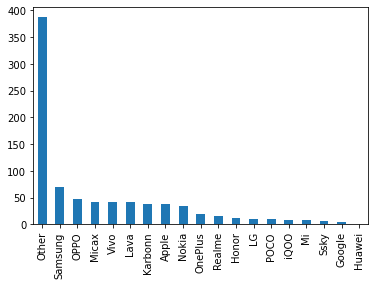

In [19]:
df['Brand'].value_counts().plot(kind='bar')

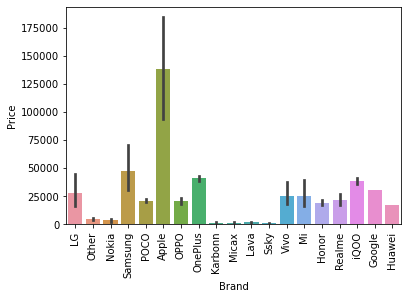

In [20]:
# Brand Price With Respect To Mobile Company

sns.barplot(x=df['Brand'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

### Selfi_Cam has 269 Nan value 

##### So we can create new category where phone has no selfi_cam with "0" mega-pixel


In [21]:
df['Selfi_Cam'] = df['Selfi_Cam'].fillna(0)

In [22]:
df.head(2)

,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price,Brand
0,"LG V30+ (Black, 128 )",4.3,4.0,128.0,6.0,48,13.0,4000,24999,LG
1,I Kall K11,3.4,6.0,64.0,4.5,48,12.0,4000,15999,Other


In [23]:
df['Selfi_Cam'].value_counts()

0.0     274
8.0     114
5.0     100
12.0     80
13.0     66
2.0      60
20.0     31
1.0      21
15.0     20
16.0      9
32.0      9
7.0       9
11.0      8
23.0      7
14.0      7
22.0      7
18.0      5
21.0      3
10.0      2
17.0      1
61.0      1
4.0       1
6.0       1
Name: Selfi_Cam, dtype: int64

- They will be converted into categorical columns

### Checking Mobile Size

In [24]:
df['Mobile_Size'].fillna(df['Mobile_Size'].median(),inplace=True) 

In [25]:
df.head()

,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price,Brand
0,"LG V30+ (Black, 128 )",4.3,4.0,128.0,6.00,48,13.0,4000,24999,LG
1,I Kall K11,3.4,6.0,64.0,4.50,48,12.0,4000,15999,Other
2,Nokia 105 ss,4.3,4.0,4.0,4.50,64,16.0,4000,15000,Nokia
3,"Samsung Galaxy A50 (White, 64 )",4.4,6.0,64.0,6.40,48,15.0,3800,18999,Samsung
4,"POCO F1 (Steel Blue, 128 )",4.5,6.0,128.0,6.18,35,15.0,3800,18999,POCO


### Checking ROM

In [26]:
df['ROM'].value_counts()

32.0     316
64.0     236
128.0    142
256.0     33
16.0      29
4.0       25
24.0      14
25.0      10
3.0        3
20.0       3
40.0       3
12.0       3
8.0        3
35.0       3
56.0       2
22.0       1
0.0        1
2.0        1
51.0       1
15.0       1
10.0       1
2.4        1
Name: ROM, dtype: int64

In [27]:
df['ROM'].fillna(df['ROM'].median(),inplace=True) 

### Checking RAM

In [28]:
df['RAM'].value_counts()

6.0     430
8.0     158
4.0     113
3.0      40
12.0     31
2.0      21
1.0      20
10.0      7
5.0       4
0.0       2
30.0      1
25.0      1
34.0      1
Name: RAM, dtype: int64

In [29]:
len(df['RAM'].value_counts())

13

In [30]:
df['RAM'].fillna(df['RAM'].median(), inplace=True)

### Checking Rating

In [31]:
df['Ratings'].fillna(df['Ratings'].median(), inplace=True)

In [32]:
df.head()

,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price,Brand
0,"LG V30+ (Black, 128 )",4.3,4.0,128.0,6.00,48,13.0,4000,24999,LG
1,I Kall K11,3.4,6.0,64.0,4.50,48,12.0,4000,15999,Other
2,Nokia 105 ss,4.3,4.0,4.0,4.50,64,16.0,4000,15000,Nokia
3,"Samsung Galaxy A50 (White, 64 )",4.4,6.0,64.0,6.40,48,15.0,3800,18999,Samsung
4,"POCO F1 (Steel Blue, 128 )",4.5,6.0,128.0,6.18,35,15.0,3800,18999,POCO


In [33]:
df['Ratings'].value_counts()

4.1    128
4.5    109
4.4     91
3.9     74
4.3     72
3.8     63
4.2     58
4.0     43
3.7     36
3.6     34
3.5     32
4.6     31
3.4     27
4.7     25
3.0      4
3.2      3
3.3      2
2.8      2
3.1      1
4.8      1
Name: Ratings, dtype: int64

In [34]:
len(df['Ratings'].value_counts())

20

### Teating Target Columns Skewness

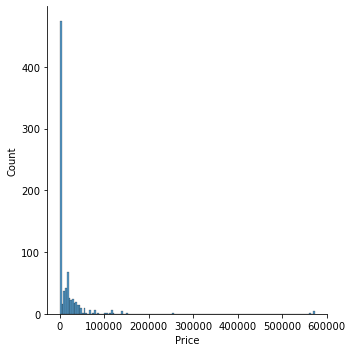

In [35]:
sns.displot(df['Price'])

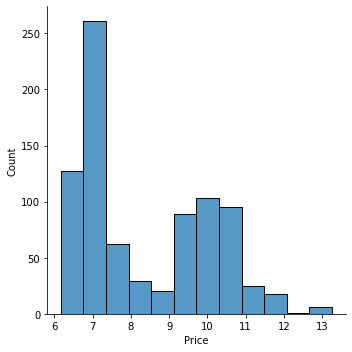

In [36]:
sns.displot(np.log(df['Price']))

In [37]:
df.isna().sum()

Brand me         0
Ratings          0
RAM              0
ROM              0
Mobile_Size      0
Primary_Cam      0
Selfi_Cam        0
Battery_Power    0
Price            0
Brand            0
dtype: int64

### Outlier Detection

In [38]:
outlier = []

def detect_outlier(data):
    Threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score) > Threshold:
            outlier.append(i)
    return outlier

out = detect_outlier(df['Price'])
out

[573000, 573000, 253000, 563000, 573000, 573000, 563000]

In [39]:
df[df['Price']==563000]

,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price,Brand
437,"Samsung Galaxy S10 (Prism White, 512 )",4.6,8.0,128.0,6.1,48,12.0,3000,563000,Samsung
774,"Samsung Galaxy S10 (Prism White, 512 )",4.6,8.0,128.0,6.1,48,12.0,3000,563000,Samsung


In [40]:
df[df['Price']==573000]

,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price,Brand
35,"Apple iPhone XR ((PRODUCT)RED, 128 )",4.6,12.0,128.0,6.1,35,7.0,3500,573000,Apple
115,"Apple iPhone XR (Yellow, 128 )",4.6,12.0,64.0,6.1,35,7.0,3500,573000,Apple
454,"Apple iPhone XR ((PRODUCT)RED, 128 )",4.6,12.0,64.0,6.1,35,7.0,3500,573000,Apple
500,"Apple iPhone XR (Coral, 128 )",4.6,12.0,64.0,6.1,35,7.0,3500,573000,Apple


- Outliers seems important in this case

In [41]:
df.drop(columns=['Brand me'],inplace=True)

<AxesSubplot:>

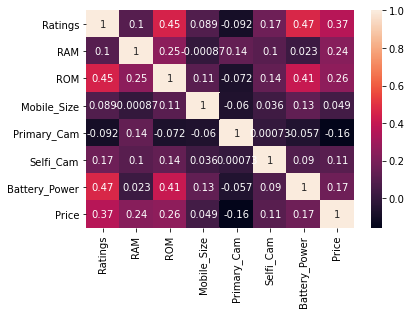

In [42]:
sns.heatmap(df.corr(),annot=True)

### Splitting Data

In [43]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])          # Logged y

In [44]:
X

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Brand
0,4.3,4.0,128.0,6.00,48,13.0,4000,LG
1,3.4,6.0,64.0,4.50,48,12.0,4000,Other
2,4.3,4.0,4.0,4.50,64,16.0,4000,Nokia
3,4.4,6.0,64.0,6.40,48,15.0,3800,Samsung
4,4.5,6.0,128.0,6.18,35,15.0,3800,POCO
...,...,...,...,...,...,...,...,...
831,3.8,6.0,32.0,4.54,48,12.0,2800,Karbonn
832,4.1,8.0,64.0,4.54,64,0.0,2500,Other
833,4.4,3.0,32.0,6.20,48,1.0,3800,Other
834,3.7,10.0,32.0,4.50,64,0.0,3500,Other


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [46]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
import xgboost as xgb

In [47]:
X_train

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Brand
197,4.1,6.0,32.0,4.54,48,20.0,3000,Other
237,3.5,6.0,64.0,4.50,48,12.0,3000,Other
445,3.8,12.0,24.0,2.00,64,0.0,1550,Other
622,4.3,6.0,128.0,5.99,35,12.0,3000,Mi
720,4.5,8.0,256.0,6.39,48,13.0,3800,Other
...,...,...,...,...,...,...,...,...
274,4.5,6.0,128.0,6.50,64,8.0,5000,Other
175,4.2,6.0,128.0,6.08,48,8.0,4030,Mi
424,4.1,6.0,32.0,44.00,48,15.0,3000,Other
816,4.2,4.0,4.0,4.50,64,13.0,3500,Nokia


In [48]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse=False, drop='first'),[7])],
                          remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([('step1',step1), ('step2',step2)])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2-Score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2-Score 0.7920457376389705
MAE 0.5787754064582069


In [49]:
np.exp(0.59)

1.803988415397857

In [50]:
def applyAlgo(algo):
    step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse=False, drop='first'),[7])],
                              remainder='passthrough')

    step2 = algo()

    pipe = Pipeline([('step1',step1), ('step2',step2)])

    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)

    print(algo)
    print('R2-Score', r2_score(y_test, y_pred))
    print('MAE', mean_absolute_error(y_test, y_pred))
    print('-'*50)

In [51]:
algorithms = [RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, LinearRegression, Lasso, Ridge, 
                DecisionTreeRegressor, KNeighborsRegressor, ExtraTreesRegressor]

for i in algorithms:
    applyAlgo(i)

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
R2-Score 0.9390482231625342
MAE 0.17476343356318957
--------------------------------------------------
<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
R2-Score 0.9290013936881132
MAE 0.24925012315644607
--------------------------------------------------
<class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'>
R2-Score 0.8395865100057234
MAE 0.4944486700862837
--------------------------------------------------
<class 'sklearn.linear_model._base.LinearRegression'>
R2-Score 0.7920457376389705
MAE 0.5787754064582069
--------------------------------------------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
R2-Score 0.4909333240004772
MAE 0.95497124329074
--------------------------------------------------
<class 'sklearn.linear_model._ridge.Ridge'>
R2-Score 0.7801712086531498
MAE 0.5903362164355451
--------------------------------------------------
<class 'sklearn.tree._classes.DecisionTreeRegressor'>
R2-

### Applying Voting Regressor

In [52]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[7])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
dt = DecisionTreeRegressor(max_features=0.75,max_depth=15)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('dt',dt), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9574200408058599
MAE 0.18545653916569654


### Stacking

In [53]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[7])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('et', ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9567578643895199
MAE 0.19802995603997034


In [54]:
import pickle

pickle.dump(df,open('data_mobile.pkl','wb'))
pickle.dump(pipe,open('pipe_mobile.pkl','wb'))